In [5]:
from google.colab import drive
import os
drive.mount('/content/gdrive') 
%cd /content/gdrive/'Shared with me'/Stats/'Datasets'
print(os.listdir())

MessageError: ignored

In [ ]:
import csv
import time
import timeit
import scipy.io
import numpy as np
import pandas as pd
import xgboost as xgb
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
print(os.getcwd())
print(os.listdir())

/content
['.config', 'gdrive', 'sample_data']


In [2]:
path = '/content/gdrive/My Drive/Churn Research.csv'

#Data Importation : 
data_set = pd.read_csv(path)

#Cleaning Dataframe :
df = pd.DataFrame(data_set)
T = df[['APPKEY','IS_CHURN','COMPANYSIZE','MONTH_ACTIVE', 'PAGEVIEWS', 'PLAYS', 'CLICKS', 'CONVERSIONS', 'LIVE_DAYS','BUBBLE_VIEWS', 'STORIES_VIEWS', 'CAROUSEL_VIEWS', 'EMBED_VIEWS','LANDINGPAGE_VIEWS', 'FEEDS', 'DYNAMIC', 'COUNT_LIVE_TOLSTOYS', 'TOTAL_PAY']]
T = T.dropna()
T['DYNAMIC'] = T['DYNAMIC'].replace({'1':True, '0':False})
T['DYNAMIC'] = T['DYNAMIC'].astype(bool)

T['COMPANYSIZE'] = T['COMPANYSIZE'].replace({'1-10':10, '1-20': 20, '1001+':2000, '101-1000':1000, '101-200':200, '11-50':50, '201-1000':1000, '201-500':500, '21-50':50, '500+':1000, '51-100':100, '51-200':200})
T['COMPANYSIZE'] = T['COMPANYSIZE'].astype(int)
T.keys()

NameError: ignored

In [3]:
#Churn analyze :
nber_CHRUN = (T["IS_CHURN"] == True).sum()
rt_CHRUN = (nber_CHRUN/len(T))*100
print("Number of CHRUN in the dataframe : ", nber_CHRUN)
print("Rate of CHRUN in the dataframe : ", rt_CHRUN,"%")

NameError: ignored

In [1]:
#Features : 
X = T[['MONTH_ACTIVE', 'COMPANYSIZE', 'PAGEVIEWS', 'PLAYS', 'CLICKS', 'CONVERSIONS', 'LIVE_DAYS','BUBBLE_VIEWS', 'STORIES_VIEWS', 'CAROUSEL_VIEWS', 'EMBED_VIEWS','LANDINGPAGE_VIEWS', 'FEEDS', 'DYNAMIC', 'COUNT_LIVE_TOLSTOYS', 'TOTAL_PAY']]
#Label : 
y = T['IS_CHURN']

NameError: ignored

In [ ]:
#Split data into train & test data : 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Classification model : 
start_time = time.time()

model = RandomForestClassifier()
model.fit(X, y)

compilation_time = time.time() - start_time

#Features importance ranking in the model : 
feature_importances = model.feature_importances_

mon_dict = {}

mon_dict = {"'MONTH_ACTIVE' :        ": feature_importances[0], 
            "'COMPANYSIZE' :         ": feature_importances[1], 
            "'PAGEVIEWS' :           ": feature_importances[2], 
            "'PLAYS' :               ": feature_importances[3], 
            "'CLICKS' :              ": feature_importances[4], 
            "'CONVERSIONS' :         ": feature_importances[5], 
            "'LIVE_DAYS' :           ": feature_importances[6], 
            "'BUBBLE_VIEWS' :        ": feature_importances[7], 
            "'STORIES_VIEWS' :       ": feature_importances[8], 
            "'CAROUSEL_VIEWS' :      ": feature_importances[9], 
            "'EMBED_VIEWS' :         ": feature_importances[10],
            "'LANDINGPAGE_VIEWS' :   ": feature_importances[11],
            "'FEEDS' :               ": feature_importances[12],
            "'DYNAMIC' :             ": feature_importances[13],
            "'COUNT_LIVE_TOLSTOYS' : ": feature_importances[14],
            "'TOTAL_PAY' :           ": feature_importances[15]}

clés_triees = sorted(mon_dict.keys(), reverse=True)
valeurs_triees = sorted(mon_dict.values(), reverse=True)

i = 1
print("Attributes importance ranking : \n\n")
for valeur in valeurs_triees:
    for clé, v in mon_dict.items():
        if v == valeur:
            print(i, ") Importance score ", clé, v, "\n")
            i += 1
            break


print("\n\n Compilation time :", compilation_time, 'sec')


Attributes importance ranking : 


1 ) Importance score  'TOTAL_PAY' :            0.13276100936475377 

2 ) Importance score  'LIVE_DAYS' :            0.11994799620775647 

3 ) Importance score  'PAGEVIEWS' :            0.11988608088908062 

4 ) Importance score  'PLAYS' :                0.11764508766240932 

5 ) Importance score  'MONTH_ACTIVE' :         0.0915426916579987 

6 ) Importance score  'CLICKS' :               0.07773452702812711 

7 ) Importance score  'BUBBLE_VIEWS' :         0.07754653001284999 

8 ) Importance score  'COMPANYSIZE' :          0.05005055168109137 

9 ) Importance score  'CONVERSIONS' :          0.04277341444885372 

10 ) Importance score  'COUNT_LIVE_TOLSTOYS' :  0.0400433473422338 

11 ) Importance score  'EMBED_VIEWS' :          0.03861271294505213 

12 ) Importance score  'LANDINGPAGE_VIEWS' :    0.026065914198965475 

13 ) Importance score  'CAROUSEL_VIEWS' :       0.024547540878276822 

14 ) Importance score  'FEEDS' :                0.02437473746867

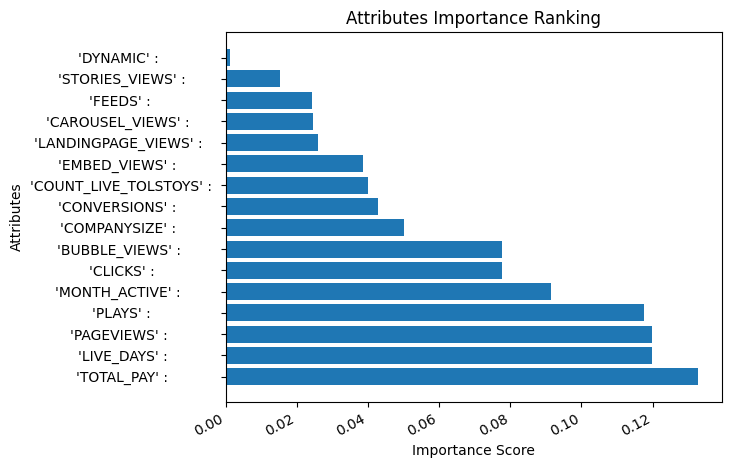

In [ ]:
#Analyzing the ranking importance with a graphic : 
clés_triees = sorted(mon_dict.keys(), key=mon_dict.get, reverse=True)
valeurs_triees = sorted(mon_dict.values(), reverse=True)

plt.barh(range(len(clés_triees)), valeurs_triees)
plt.yticks(range(len(clés_triees)), clés_triees)
plt.xlabel('Importance Score')
plt.ylabel('Attributes')
plt.title('Attributes Importance Ranking')
largeur_barre = 0.9
plt.xticks(rotation=28, ha="right")
plt.show()

In [ ]:
#Model metrics : 
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("Rapport de classification :\n", report)

Rapport de classification :
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       163
        True       1.00      1.00      1.00       101

    accuracy                           1.00       264
   macro avg       1.00      1.00      1.00       264
weighted avg       1.00      1.00      1.00       264



In [4]:
#Ranking of the 10 customers most likely to unsubscribe from the service : 
probabilities = model.predict_proba(X)
true_probabilities = probabilities[:, 1]

churn_examples = []

for i, prob in enumerate(true_probabilities):
    if y.iloc[i] == 0:
        churn_examples.append((prob, X.iloc[i]))

churn_examples_sorted = sorted(churn_examples, key=lambda x: x[0], reverse=True)

for i in range(10):
    prob, row = churn_examples_sorted[i]
    print(f"Probability to unsubscribe : {prob}")
    print("Information :")
    for column, value in row.iteritems():
        print(f"{column}: {value}")
    print()

NameError: ignored

In [ ]:
#Merge datasets to obtain a csv file presenting the service's customer data with all their information 
top_10_examples = churn_examples_sorted

new_df = pd.DataFrame([row for prob, row in top_10_examples], columns=df.columns)

new_df['probability'] = [prob for prob, _ in top_10_examples]

temp_df = pd.DataFrame([row for prob, row in top_10_examples], columns=X.columns)

temp_df['probability'] = [prob for prob, _ in top_10_examples]

merged_df = pd.merge(temp_df, df, on=['PAGEVIEWS','TOTAL_PAY'])

merged_df.to_csv('/content/gdrive/My Drive/CustomersMoreLikelyToUnsubscribe.csv', index=False)

path1 = '/content/gdrive/My Drive/The10CustomersMoreLikelyToUnsubscribe.csv'

new_df.to_csv(path1, index=False)

In [ ]:
merged_df
merged_df.to_csv('/content/gdrive/My Drive/Test.csv', index=False)

In [ ]:
merge_update = merged_df[['APPKEY','probability', 'TOTAL_PAY',  'LIVE_DAYS_x', 'PLAYS_x', 'PAGEVIEWS', 'CLICKS_x', 'MONTH_ACTIVE_x', 'BUBBLE_VIEWS_x', 'DYNAMIC_x']]
merge_update.to_csv('/content/gdrive/My Drive/RelevantAttributze_CustomersMoreLikelyToUnsubscribe.csv', index=False)


                probability  TOTAL_PAY  LIVE_DAYS_x   PLAYS_x  PAGEVIEWS  \
probability        1.000000  -0.129977    -0.368863 -0.113527  -0.051043   
TOTAL_PAY         -0.129977   1.000000     0.173904  0.311676   0.208900   
LIVE_DAYS_x       -0.368863   0.173904     1.000000  0.132174   0.102906   
PLAYS_x           -0.113527   0.311676     0.132174  1.000000   0.832048   
PAGEVIEWS         -0.051043   0.208900     0.102906  0.832048   1.000000   
CLICKS_x          -0.006135   0.243345     0.207174  0.290149   0.149190   
MONTH_ACTIVE_x    -0.446446   0.168557     0.774561  0.039212   0.029310   
BUBBLE_VIEWS_x    -0.028097   0.150859     0.108943  0.773233   0.978915   
DYNAMIC_x         -0.118988   0.042120    -0.126615  0.012281   0.005610   

                CLICKS_x  MONTH_ACTIVE_x  BUBBLE_VIEWS_x  DYNAMIC_x  
probability    -0.006135       -0.446446       -0.028097  -0.118988  
TOTAL_PAY       0.243345        0.168557        0.150859   0.042120  
LIVE_DAYS_x     0.207174     

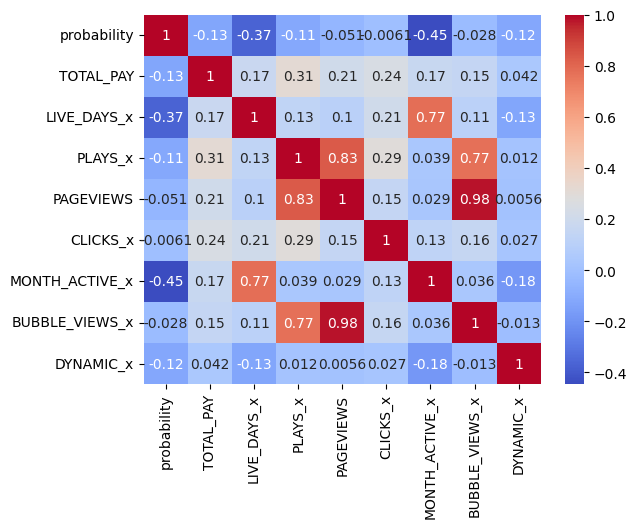

In [ ]:
#Creation of a correlation table to analyze the differents features' impacts on the probability variable : 
import seaborn as sns
correlation_matrix = merge_update[['probability', 'TOTAL_PAY',  'LIVE_DAYS_x', 'PLAYS_x', 'PAGEVIEWS', 'CLICKS_x', 'MONTH_ACTIVE_x', 'BUBBLE_VIEWS_x','DYNAMIC_x']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
print(correlation_matrix)